## Loading the data and other imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import joblib
from scipy.stats import chi2_contingency

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('data.csv')

## Exploratory Data Analysis

In [5]:
df.shape

(1600, 10)

In [6]:
df.head()

,UserID,address,age,applying position,experience,leadership experience,english proficiency,salary expectation,gender,category
0,GSG0EAXT,"NO. 90, GALLE ROAD, MOUNT LAVINIA",21,Trainee,Below 1 year,no experience,Beginner,40000,Male,low level
1,0W96UDHS,"NO. 08, GRAND STAND RACE COURSE, REID AVENUE, ...",22,Junior Developer,1-2 years,2-5 years experience,Beginner,80000,Female,low-mid level
2,H3QKDUZ1,"NO. 38/F, D.R. WIJEWARDANA MAWATHA, COLOMBO 10",32,Senior Engineer,5-10 years,5 years+ experience,Fluent,410000,Male,mid-high level
3,FOYA4EOG,"PINNAWALA, RAMBUKKANA",31,Associate Engineer,1-2 years,1-2 years experience,Fluent,130000,Female,mid level
4,KSEI5T2V,"PINNAWALA , RAMBUKKANA",50,Senior Engineer,5-10 years,5 years+ experience,Fluent,600000,Male,high level


In [7]:
df.tail()

,UserID,address,age,applying position,experience,leadership experience,english proficiency,salary expectation,gender,category
1595,8GOOXOAU,"630.PRINCE OF WALES AVENUE,COLOMBO14",19,Intern,Below 1 year,no experience,Intermediate,50000,Male,low level
1596,09OPBJ1G,"27A,ANAGARIKA DHARMAPALA MW,KANDY.",22,Junior Developer,1-2 years,no experience,Fluent,60000,Male,low-mid level
1597,JFKU1JR4,"78 MAIN ROAD,KALPITIYA,",42,Senior Engineer,10+ years,1-2 years experience,Fluent,157000,Male,mid-high level
1598,76HR7XZI,"WAULAGODA, HIKKADUWA",29,Software Engineer,5-10 years,no experience,Intermediate,87000,Female,mid level
1599,0RNM7F1D,"NO.28/1,HORTON PLACE,COLOMBO 07",54,Principal Engineer,5-10 years,5 years+ experience,Fluent,236000,Male,high level


In [8]:
df.columns

Index(['UserID', 'address', 'age', 'applying position', 'experience',
       'leadership experience', 'english proficiency', 'salary expectation',
       'gender', 'category'],
      dtype='object')

In [9]:
cl = ['age', 'applying position',
       'experience', 'leadership experience', 'english proficiency',
       'salary expectation', 'gender', 'category']

In [10]:
for i in cl:
    print(f'{i}: {df[i].unique()}')

age: [21 22 32 31 50 20 26 45 28 51 34 53 29 38 18 47 33 30 23 25 39 46 41 44
 54 19 43 35 24 40 48 55 27 36 42 49 37 52]
applying position: ['Trainee' 'Junior Developer' 'Senior Engineer' 'Associate Engineer'
 'Intern' 'Junior Engineer' 'Software Engineer' 'Principal Engineer'
 'Tech Lead' 'Architect']
experience: ['Below 1 year' '1-2 years' '5-10 years' '2-5 years' 'No experience'
 '10+ years']
leadership experience: ['no experience' '2-5 years experience' '5 years+ experience'
 '1-2 years experience']
english proficiency: ['Beginner' 'Fluent' 'Intermediate']
salary expectation: [  40000   80000  410000  130000  600000   50000  170000  820000   30000
  320000  180000  680000  490000  650000  450000  150000  940000  460000
  190000  990000   60000  230000  690000  210000  120000  830000  480000
  960000  710000   70000  790000  140000  780000  310000  740000  580000
  370000  270000  560000  360000  640000  280000  160000  300000  200000
  630000  390000  420000  380000  430000  34000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   UserID                 1600 non-null   object
 1   address                1600 non-null   object
 2   age                    1600 non-null   int64 
 3   applying position      1600 non-null   object
 4   experience             1600 non-null   object
 5   leadership experience  1600 non-null   object
 6   english proficiency    1600 non-null   object
 7   salary expectation     1600 non-null   int64 
 8   gender                 1600 non-null   object
 9   category               1600 non-null   object
dtypes: int64(2), object(8)
memory usage: 125.1+ KB


In [12]:
df.describe()

,age,salary expectation
count,1600.000000,1600.000000
mean,29.668750,177768.125000
std,9.496006,212299.004711
min,18.000000,30000.000000
25%,22.000000,50000.000000
50%,28.000000,88000.000000
75%,35.000000,190000.000000
max,55.000000,1000000.000000


([0, 1, 2, 3, 4],
 [Text(0, 0, 'low level'),
  Text(1, 0, 'low-mid level'),
  Text(2, 0, 'mid-high level'),
  Text(3, 0, 'mid level'),
  Text(4, 0, 'high level')])

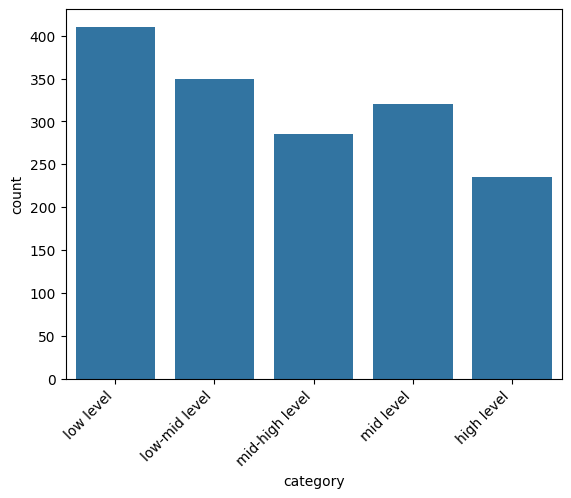

In [13]:
sns.countplot(x='category',data=df)
plt.xticks(rotation=45, ha='right')

In [14]:
# def remove_outliers(group):
#     Q1 = group['Age'].quantile(0.25)
#     Q3 = group['Age'].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR 
    
#     return group[(group['Age'] >= lower_bound) & (group['Age'] <= upper_bound)]




In [15]:
# df = df.groupby('Category').apply(remove_outliers).reset_index(drop=True)

In [14]:
df.columns

Index(['UserID', 'address', 'age', 'applying position', 'experience',
       'leadership experience', 'english proficiency', 'salary expectation',
       'gender', 'category'],
      dtype='object')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'low level'),
  Text(1, 0, 'low-mid level'),
  Text(2, 0, 'mid-high level'),
  Text(3, 0, 'mid level'),
  Text(4, 0, 'high level')])

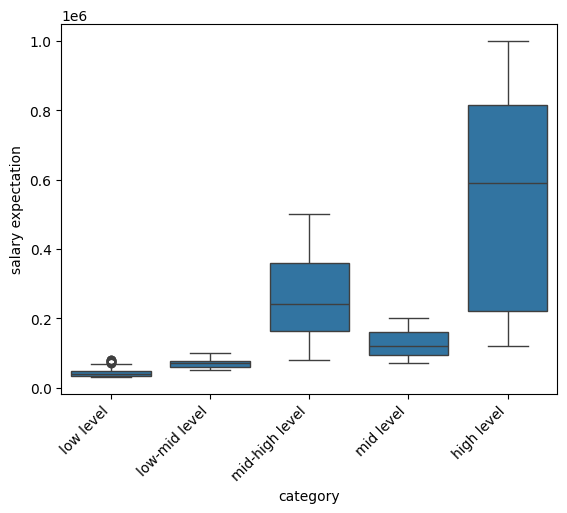

In [15]:
sns.boxplot(x='category',y='salary expectation',data=df)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'low level'),
  Text(1, 0, 'low-mid level'),
  Text(2, 0, 'mid-high level'),
  Text(3, 0, 'mid level'),
  Text(4, 0, 'high level')])

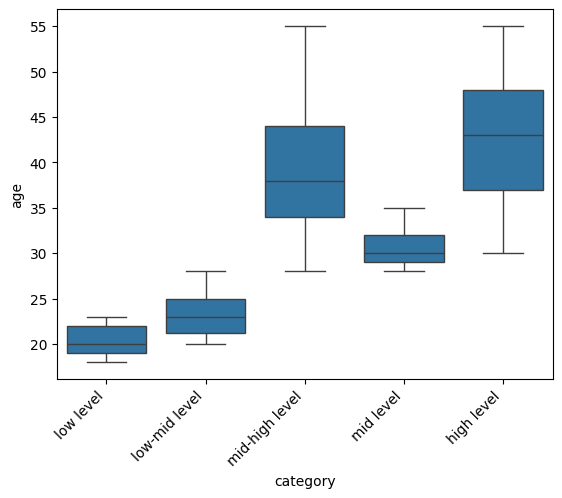

In [16]:
sns.boxplot(x='category',y='age',data=df)
plt.xticks(rotation=45, ha='right')

In [17]:
df.columns

Index(['UserID', 'address', 'age', 'applying position', 'experience',
       'leadership experience', 'english proficiency', 'salary expectation',
       'gender', 'category'],
      dtype='object')

([0, 1], [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

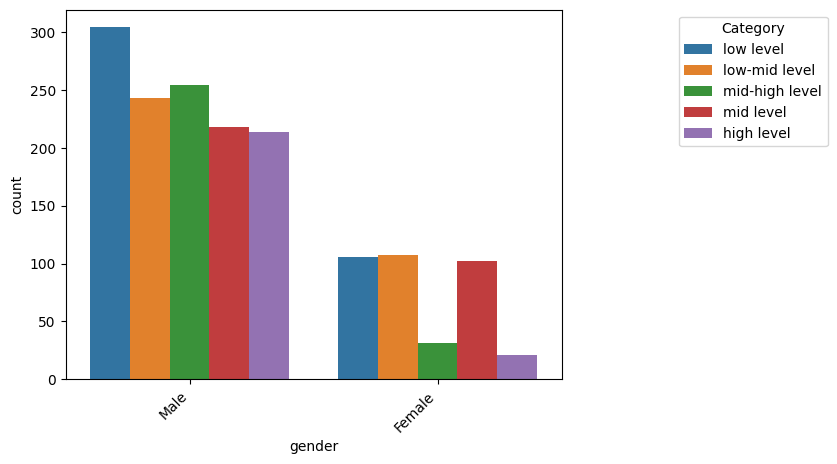

In [18]:
sns.countplot(x='gender',data=df,hue='category')
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)
plt.xticks(rotation=45, ha='right')

([0, 1, 2],
 [Text(0, 0, 'Beginner'), Text(1, 0, 'Fluent'), Text(2, 0, 'Intermediate')])

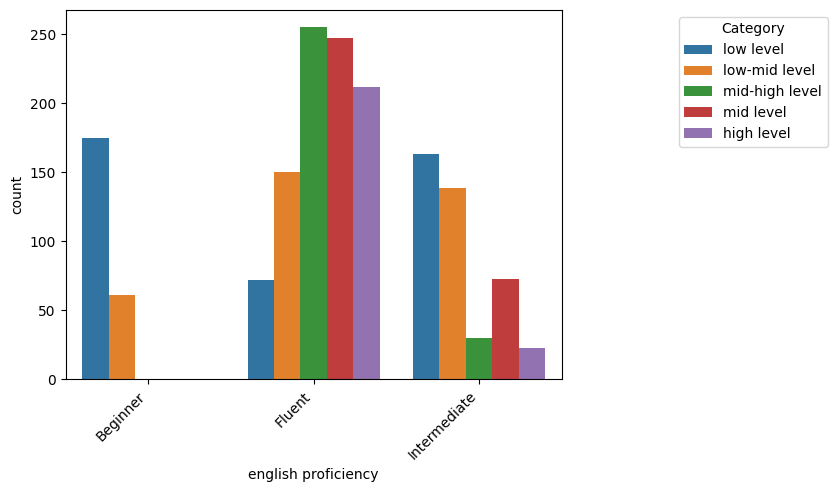

In [19]:
sns.countplot(x='english proficiency',data=df,hue='category')
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3],
 [Text(0, 0, 'no experience'),
  Text(1, 0, '2-5 years experience'),
  Text(2, 0, '5 years+ experience'),
  Text(3, 0, '1-2 years experience')])

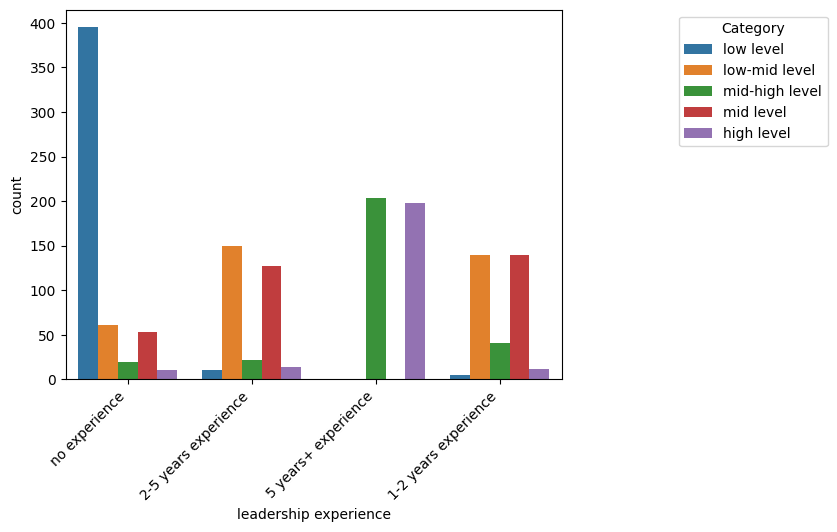

In [20]:
sns.countplot(x='leadership experience',data=df,hue='category')
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Below 1 year'),
  Text(1, 0, '1-2 years'),
  Text(2, 0, '5-10 years'),
  Text(3, 0, '2-5 years'),
  Text(4, 0, 'No experience'),
  Text(5, 0, '10+ years')])

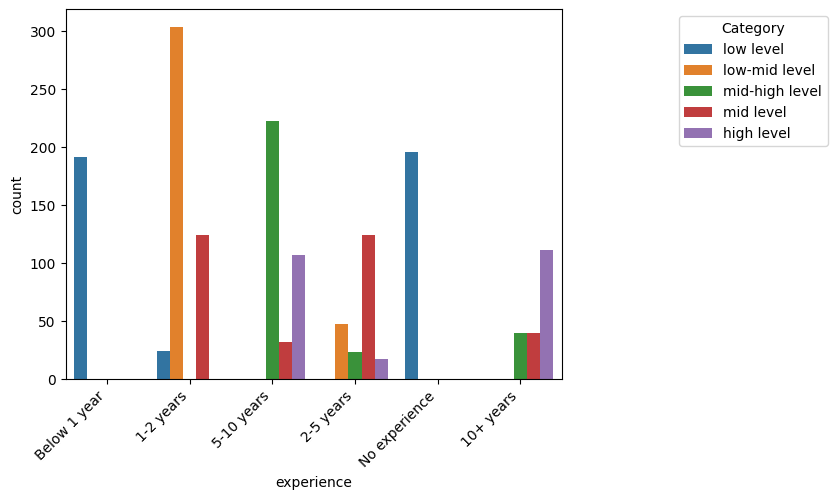

In [21]:
sns.countplot(x='experience',data=df,hue='category')
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Trainee'),
  Text(1, 0, 'Junior Developer'),
  Text(2, 0, 'Senior Engineer'),
  Text(3, 0, 'Associate Engineer'),
  Text(4, 0, 'Intern'),
  Text(5, 0, 'Junior Engineer'),
  Text(6, 0, 'Software Engineer'),
  Text(7, 0, 'Principal Engineer'),
  Text(8, 0, 'Tech Lead'),
  Text(9, 0, 'Architect')])

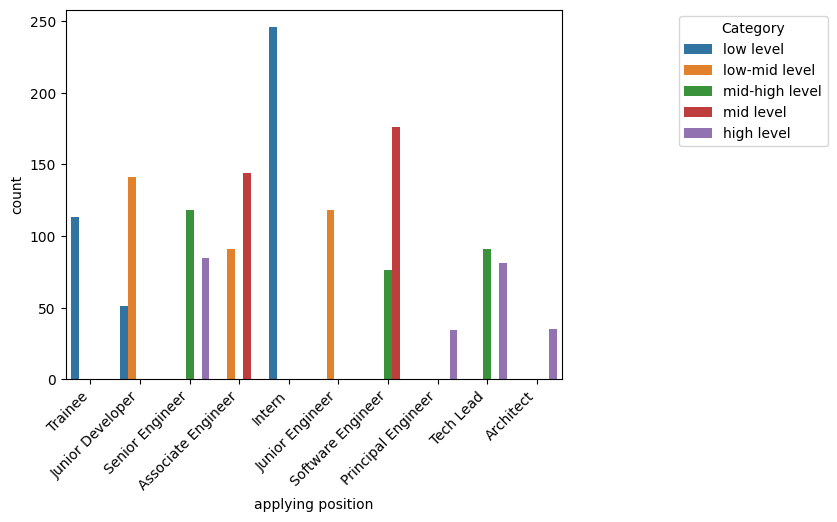

In [22]:
sns.countplot(x='applying position',data=df,hue='category')
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)
plt.xticks(rotation=45, ha='right')

In [23]:
df.head()

,UserID,address,age,applying position,experience,leadership experience,english proficiency,salary expectation,gender,category
0,GSG0EAXT,"NO. 90, GALLE ROAD, MOUNT LAVINIA",21,Trainee,Below 1 year,no experience,Beginner,40000,Male,low level
1,0W96UDHS,"NO. 08, GRAND STAND RACE COURSE, REID AVENUE, ...",22,Junior Developer,1-2 years,2-5 years experience,Beginner,80000,Female,low-mid level
2,H3QKDUZ1,"NO. 38/F, D.R. WIJEWARDANA MAWATHA, COLOMBO 10",32,Senior Engineer,5-10 years,5 years+ experience,Fluent,410000,Male,mid-high level
3,FOYA4EOG,"PINNAWALA, RAMBUKKANA",31,Associate Engineer,1-2 years,1-2 years experience,Fluent,130000,Female,mid level
4,KSEI5T2V,"PINNAWALA , RAMBUKKANA",50,Senior Engineer,5-10 years,5 years+ experience,Fluent,600000,Male,high level


### analyze the association between each independent variable and the Category

#### categorical features and Category

In [24]:
categorical_features =list(df.select_dtypes(['object']).columns)[:-1]
categorical_features

['UserID',
 'address',
 'applying position',
 'experience',
 'leadership experience',
 'english proficiency',
 'gender']

In [25]:
def cramers_v_and_p(matrix):
    chi2, p, _, _ = chi2_contingency(matrix)
    n = matrix.sum().sum()
    r, k = matrix.shape
    cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))
    return cramers_v, p

In [26]:
results = []

for features in categorical_features:

    matrix = pd.crosstab(df[features], df['category'])
    
    cv, p_value = cramers_v_and_p(matrix)
    results.append((features, cv, p_value))

In [27]:
results_df = pd.DataFrame(results, columns=['categorical features', 'Cramér\'s V', 'p-value'])

In [28]:
results_df['Significant'] = results_df['p-value'] < 0.05

In [29]:
results_df

,categorical features,Cramér's V,p-value,Significant
0,UserID,1.000000,4.835470e-01,False
1,address,0.539622,6.745971e-01,False
2,applying position,0.774534,0.000000e+00,True
3,experience,0.681527,0.000000e+00,True
4,leadership experience,0.645672,0.000000e+00,True
5,english proficiency,0.462305,2.068372e-142,True
6,gender,0.220066,5.932637e-16,True


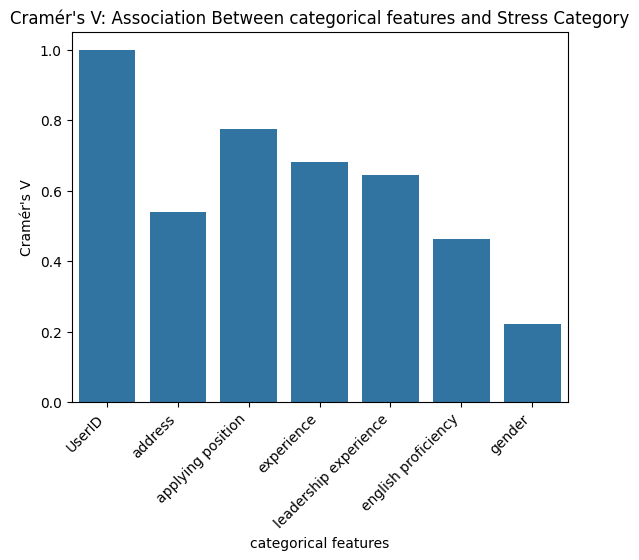

In [30]:
sns.barplot(x='categorical features', y='Cramér\'s V', data=results_df)
plt.xticks(rotation=45, ha='right')
plt.title('Cramér\'s V: Association Between categorical features and Stress Category')
plt.ylabel('Cramér\'s V')
plt.show()

In [31]:
df.drop(['UserID',
 'address'], axis=1, inplace=True)

In [32]:
categorical_features =list(df.select_dtypes(['object']).columns)[:-1]
categorical_features

['applying position',
 'experience',
 'leadership experience',
 'english proficiency',
 'gender']

#### Numerical features and Category

In [33]:
le = LabelEncoder()
df['Category Encoded'] = le.fit_transform(df['category'])

In [34]:
corr_for_numerical = df.drop(categorical_features + ["category"], axis=1).corr()
corr_for_numerical

,age,salary expectation,Category Encoded
age,1.000000,0.67324,0.163365
salary expectation,0.673240,1.00000,-0.190600
Category Encoded,0.163365,-0.19060,1.000000


In [35]:
corr_for_numerical["Category Encoded"]

age                   0.163365
salary expectation   -0.190600
Category Encoded      1.000000
Name: Category Encoded, dtype: float64

<Axes: ylabel='Category Encoded'>

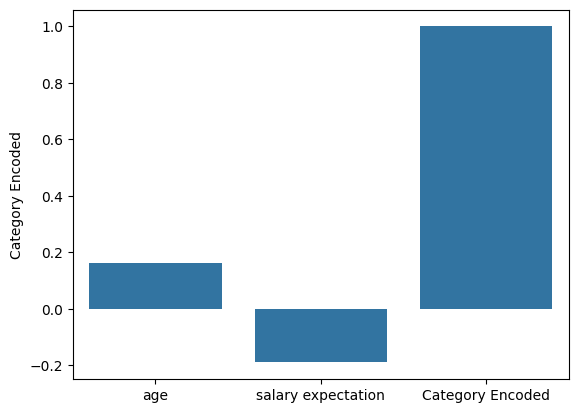

In [36]:
sns.barplot( data=corr_for_numerical["Category Encoded"] )

In [37]:
df.drop("Category Encoded", axis=1, inplace=True)

In [38]:
df.columns

Index(['age', 'applying position', 'experience', 'leadership experience',
       'english proficiency', 'salary expectation', 'gender', 'category'],
      dtype='object')

In [39]:
# df.drop(["salary expectation"], axis=1, inplace=True)

## Data PreProcessing

In [40]:
df.head()

,age,applying position,experience,leadership experience,english proficiency,salary expectation,gender,category
0,21,Trainee,Below 1 year,no experience,Beginner,40000,Male,low level
1,22,Junior Developer,1-2 years,2-5 years experience,Beginner,80000,Female,low-mid level
2,32,Senior Engineer,5-10 years,5 years+ experience,Fluent,410000,Male,mid-high level
3,31,Associate Engineer,1-2 years,1-2 years experience,Fluent,130000,Female,mid level
4,50,Senior Engineer,5-10 years,5 years+ experience,Fluent,600000,Male,high level


In [41]:
df.isnull().sum()

age                      0
applying position        0
experience               0
leadership experience    0
english proficiency      0
salary expectation       0
gender                   0
category                 0
dtype: int64

#### split dataset into training and testing sets

In [42]:
X = df.drop("category", axis=1)
y = df["category"]

#### Categorical Variables Handling

In [43]:
cat_features = list(X.select_dtypes(['object']).columns)
cat_features

['applying position',
 'experience',
 'leadership experience',
 'english proficiency',
 'gender']

In [44]:
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), cat_features)],
    remainder='passthrough')

In [45]:
X = preprocessor.fit_transform(X)


In [46]:
# dense_X = X.toarray()
# print(dense_X)

In [47]:
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

#### Train Test Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Models Training 

In [49]:
df["category"].unique()

array(['low level', 'low-mid level', 'mid-high level', 'mid level',
       'high level'], dtype=object)

In [50]:
classes = ['high level', 'low level', 'low-mid level', 'mid level','mid-high level'
       ]

def plot_confusion_matrix(y_true, y_pred, classes, figsize=(6, 4), cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred) 
    
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, cmap=cmap, fmt=".2f", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

### SVM

In [53]:
svm_classifier = SVC(kernel='linear')

In [ ]:
svm_classifier.fit(X_train, y_train)

In [ ]:
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("SVM_Accuracy:", accuracy*100)

print(classification_report(y_test, y_pred))

In [ ]:
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("SVM_Accuracy:", accuracy*100)

print(classification_report(y_test, y_pred))

SVM_Accuracy: 97.97632684230622
                         precision    recall  f1-score   support

     Adventure & Active       0.99      0.99      0.99       542
       Budget Travelers       0.98      0.97      0.98       515
Business & Work-Related       0.98      0.98      0.98       518
    Cultural & Heritage       0.97      0.98      0.97       541
    Luxury & Relaxation       0.99      0.98      0.99       503

               accuracy                           0.98      2619
              macro avg       0.98      0.98      0.98      2619
           weighted avg       0.98      0.98      0.98      2619



In [ ]:
plot_confusion_matrix(y_test, y_pred, classes)

### KNN

In [51]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [52]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred_knn = knn_classifier.predict(X_test)

In [54]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn*100)


print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 87.70833333333333
                precision    recall  f1-score   support

    high level       0.94      0.77      0.85        75
     low level       0.97      0.99      0.98       114
 low-mid level       0.85      0.93      0.89       105
     mid level       0.83      0.86      0.85       108
mid-high level       0.80      0.76      0.78        78

      accuracy                           0.88       480
     macro avg       0.88      0.86      0.87       480
  weighted avg       0.88      0.88      0.88       480



In [55]:
confusion_matrix(y_test,y_pred_knn)

array([[ 58,   0,   0,   2,  15],
       [  0, 113,   1,   0,   0],
       [  0,   3,  98,   4,   0],
       [  0,   1,  14,  93,   0],
       [  4,   0,   2,  13,  59]], dtype=int64)

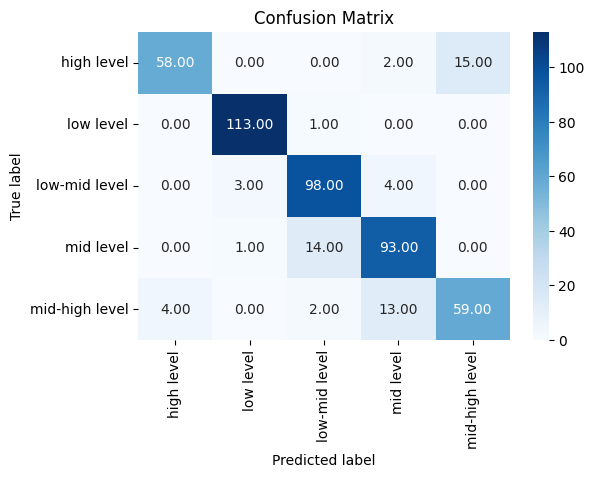

In [56]:
plot_confusion_matrix(y_test, y_pred_knn, classes)

## MLPClassifier

In [57]:
mlp_classifier = MLPClassifier()

In [58]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier()

In [59]:
y_pred_mlp = mlp_classifier.predict(X_test)

In [60]:
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLPClassifier Accuracy:", accuracy_mlp*100)

print(classification_report(y_test, y_pred_mlp))

MLPClassifier Accuracy: 16.25
                precision    recall  f1-score   support

    high level       0.00      0.00      0.00        75
     low level       0.00      0.00      0.00       114
 low-mid level       0.00      0.00      0.00       105
     mid level       0.00      0.00      0.00       108
mid-high level       0.16      1.00      0.28        78

      accuracy                           0.16       480
     macro avg       0.03      0.20      0.06       480
  weighted avg       0.03      0.16      0.05       480



c:\Users\rishe\anaconda3\envs\research_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rishe\anaconda3\envs\research_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rishe\anaconda3\envs\research_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [61]:
confusion_matrix(y_test,y_pred_mlp)

array([[  0,   0,   0,   0,  75],
       [  0,   0,   0,   0, 114],
       [  0,   0,   0,   0, 105],
       [  0,   0,   0,   0, 108],
       [  0,   0,   0,   0,  78]], dtype=int64)

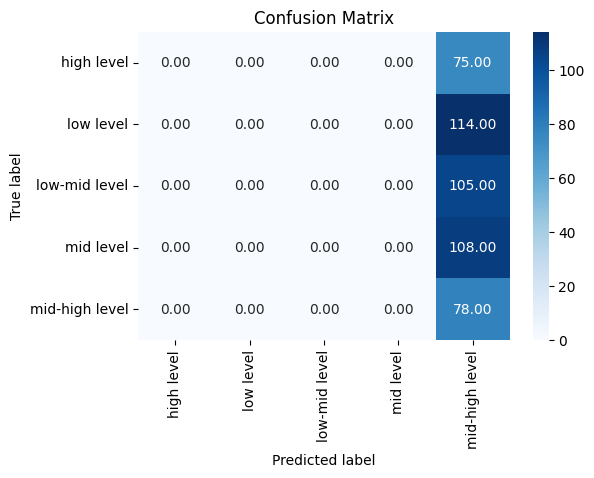

In [62]:
plot_confusion_matrix(y_test, y_pred_mlp, classes)

## Random Forest Classifier

In [63]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [64]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
y_pred_rf = rf_classifier.predict(X_test)

In [66]:
accuracy_mlp = accuracy_score(y_test, y_pred_rf)
print("RF_Classifier Accuracy:", accuracy_mlp*100)

print(classification_report(y_test, y_pred_rf))

RF_Classifier Accuracy: 94.79166666666666
                precision    recall  f1-score   support

    high level       0.89      0.85      0.87        75
     low level       0.99      0.99      0.99       114
 low-mid level       0.99      0.99      0.99       105
     mid level       0.97      0.99      0.98       108
mid-high level       0.85      0.86      0.85        78

      accuracy                           0.95       480
     macro avg       0.94      0.94      0.94       480
  weighted avg       0.95      0.95      0.95       480



In [67]:
confusion_matrix(y_test,y_pred_rf)

array([[ 64,   0,   0,   0,  11],
       [  0, 113,   1,   0,   0],
       [  0,   1, 104,   0,   0],
       [  0,   0,   0, 107,   1],
       [  8,   0,   0,   3,  67]], dtype=int64)

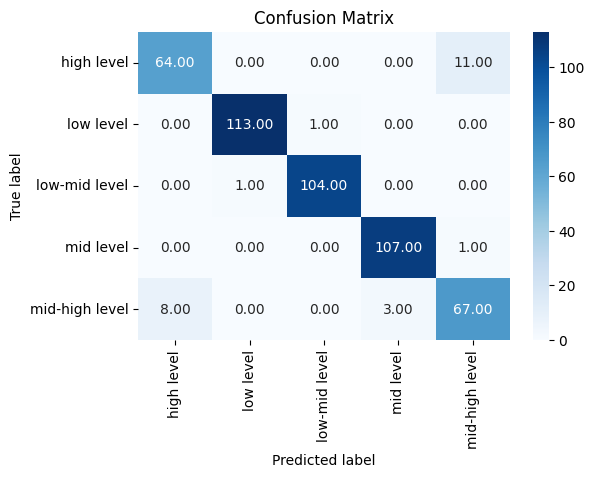

In [68]:
plot_confusion_matrix(y_test, y_pred_rf, classes)

## Save Best Model

In [69]:
with open('RF_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

## check predictions

In [ ]:
with open('RF_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
loaded_preprocessor = joblib.load('preprocessor.pkl')

In [ ]:
def get_prediction(df):
    x =loaded_preprocessor.transform(df) 
    y_pred = loaded_model.predict(x)
    print(y_pred[0])
    # return y_pred

In [ ]:
data = pd.read_csv("preprocessed_data.csv")

In [ ]:
data.head()

,age,applying position,experience,leadership experience,english proficiency,salary expectation,gender,category
0,21,Trainee,Below 1 year,no experience,Beginner,40000,Male,low level
1,22,Junior Developer,1-2 years,2-5 years experience,Beginner,80000,Female,low-mid level
2,32,Senior Engineer,5-10 years,5 years+ experience,Fluent,410000,Male,mid-high level
3,31,Associate Engineer,1-2 years,1-2 years experience,Fluent,130000,Female,mid level
4,50,Senior Engineer,5-10 years,5 years+ experience,Fluent,600000,Male,high level


In [ ]:
to_predict = data[7:8]
to_predict

,age,applying position,experience,leadership experience,english proficiency,salary expectation,gender,category
7,45,Software Engineer,5-10 years,5 years+ experience,Fluent,410000,Female,mid-high level


In [ ]:
p= to_predict.drop("category", axis=1)
p

,age,applying position,experience,leadership experience,english proficiency,salary expectation,gender
7,45,Software Engineer,5-10 years,5 years+ experience,Fluent,410000,Female


In [ ]:
get_prediction(p)



mid-high level
